# Statistics of the European XFEL


Free Electron Lasers are parametric amplifiers that actively filter the temporal and spatial frequencies of the input synchrotron radiation signal during a high-gain amplification process. Two regimes of the amplification can be identified depedening on the saturation of the electron beam. 

Prior to saturation, the amplification process is linear. We define linear-regime corresponds to the propagation distances over which $z$ < $z_{sat}$, where $z_{sat}$ is the saturation point which we define as the point where the amplification is no-longer exponential. In the case of SASE FELs, the input signal is shot-noise fluctuations in the electron beam current density which originate from Poisson processes in photo-injection, which can be approximated to be a Gaussian random process. A linearly filtered Gaussian random process is also Gaussian, therefore in the linear-regime, the field inherents the statistical properties of the beam-current. For a Gaussian process, all higher-order correlation functions can be determined from a single measurement of the correlation of the field. We therefore expect that the probability distribution of the instantaneous radiation will follow a negative-exponential, and that the integrals of the instantaeous intensity and the integrated spectral density will fluctuate in accordance with the Gamma distribution:

$
p(W) = \frac{M^M}{\Gamma(M)}\left(\frac{W}{\langle W \rangle}\right)^{M-1}\frac{1}{\langle W \rangle} \exp\left(-M\frac{W}{\langle W \rangle} \right)
$

In the non-linear regime...


In [1]:
from felpy.model.core.source import SA1_Source
from felpy.model.core.mesh import Mesh
import numpy as np
from tqdm import tqdm

In [2]:
mesh = Mesh(nx = 512, ny = 512, xMin = -300e-06, xMax = 300e-06, yMin= -300e-06, yMax= 300e-06)

gm = SA1_Source(ekev = 4.98, q = 0.25, S = 10, mesh = mesh)

def get_temporal_profiles(source, n_spectra = 10, **kwargs):
        """ 
        Return the temporal profiles of a statistical source
        """
        temporal_profiles = np.zeros([source.nz, n_spectra])
        
        for itr in tqdm(range(n_spectra)):
            temporal_profiles[:, itr] = source.get_temporal_profile(refresh = True, sigma = 3)
            
        return temporal_profiles

temporal_profiles = get_temporal_profiles(gm, n_spectra = 10000)


100%|██████████| 10000/10000 [00:01<00:00, 8071.88it/s]


(10000,)


(array([28.61153264, 13.42664102,  9.4306169 , ...,  0.        ,
         0.        ,  0.15984096]),
 array([4.05588468e-07, 6.26027439e-04, 1.25164929e-03, ...,
        6.25496767e+00, 6.25559329e+00, 6.25621891e+00]),
 <a list of 10000 Patch objects>)

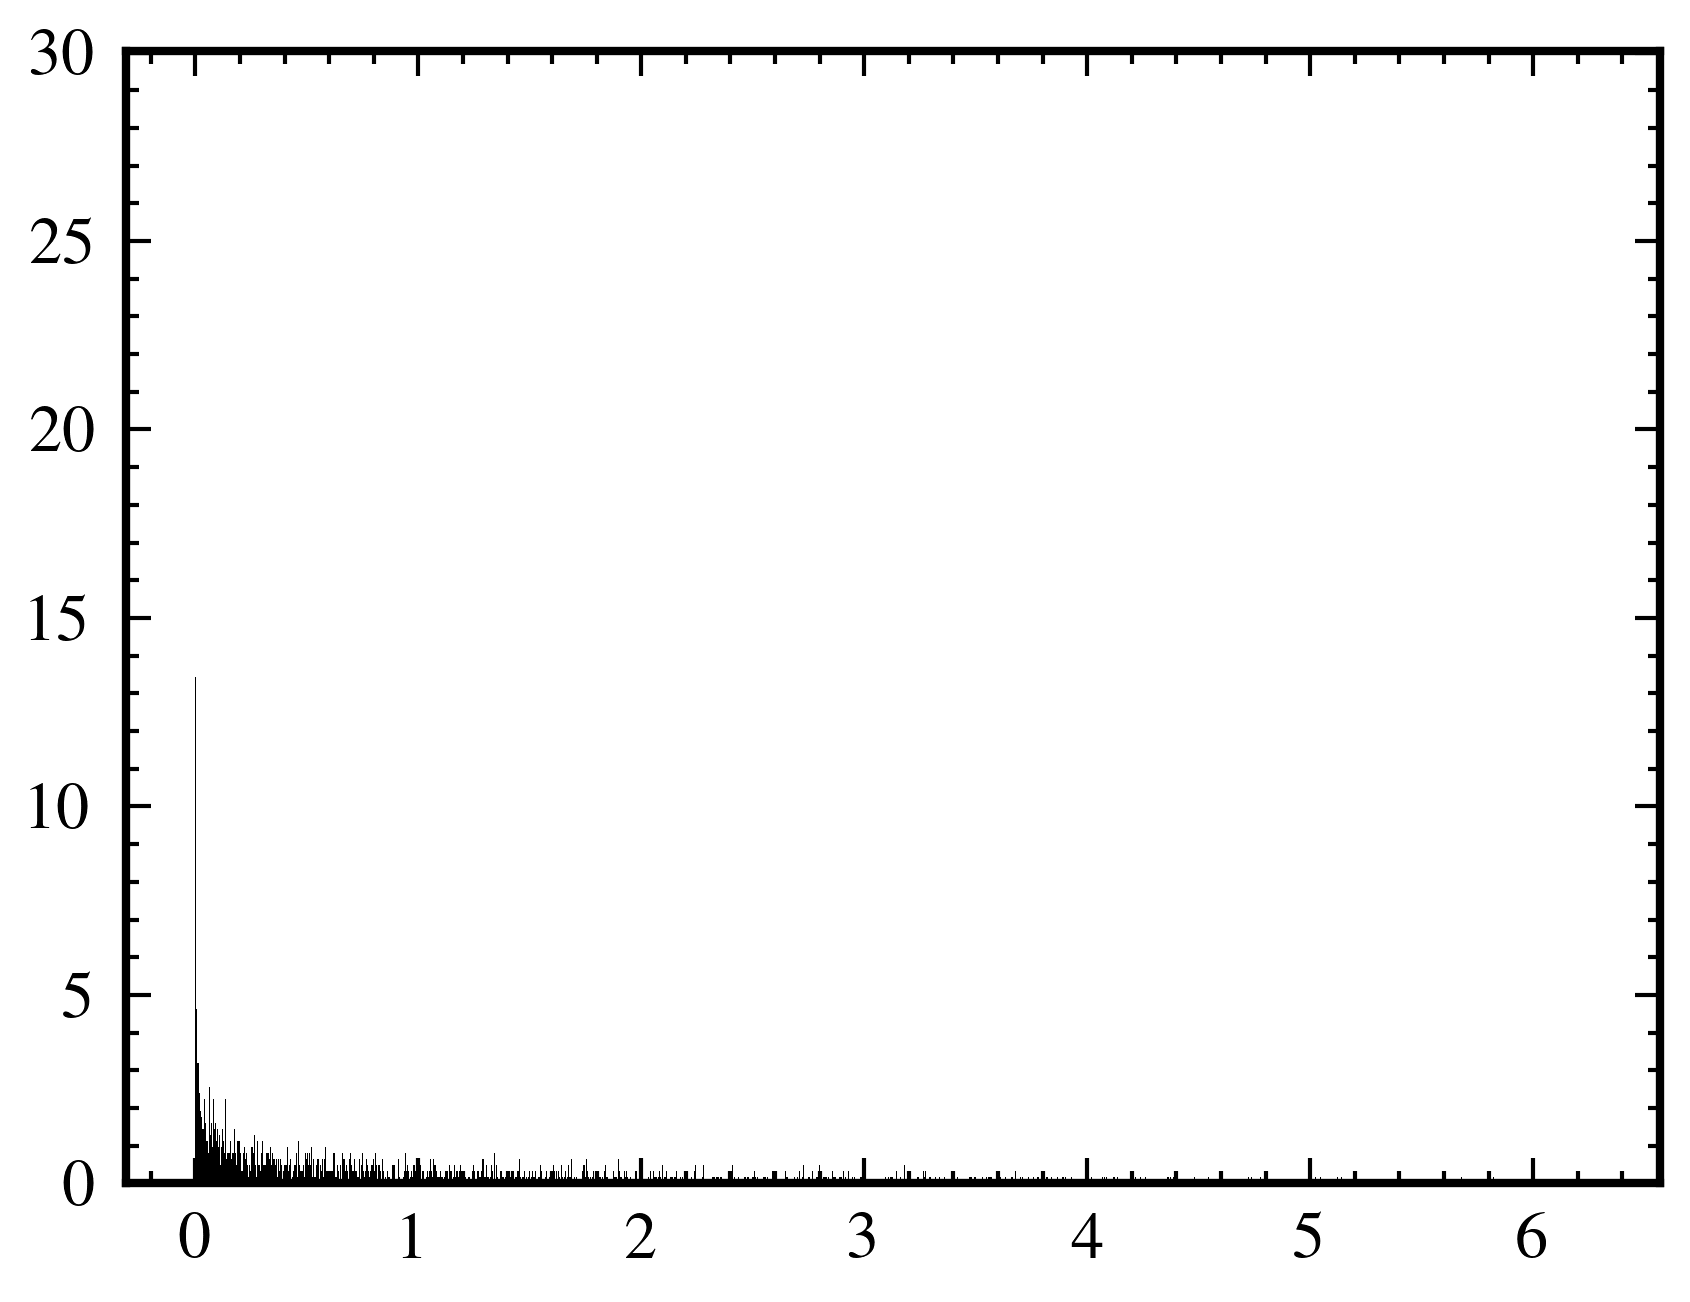

In [5]:
from matplotlib import pyplot as plt
from scipy.special import gamma
from felpy.analysis.statistics.correlation import norm
z = gm.get_axes('z')


ii_omega = abs(temporal_profiles.sum(0))**2
##ii_omega = abs(np.fft.fftshift(np.fft.fft(temporal_profiles.sum(0))))#plt.plot(a)
ii_omega_mean = ii_omega.mean()

from scipy.special import gamma

def probability(W,W_mean, M = 1):
    """
    this function defines the probability of an event M as dictated by the gamma distribution
    """
    
    return (M**M)/gamma(M)*(W/W_mean)**(M-1)*(1/W_mean)*np.exp(-M*W/W_mean)

M = 1

gamma_distribution = probability(np.linspace(0, ii_omega_mean*2),ii_omega_mean,M = M)
gamma_distribution /= np.sum(gamma_distribution)

print(ii_omega.shape)
### get actual histogram
#print(np.sum(hist/np.sum(hist)), sum(gamma_distribution))
plt.hist(ii_omega/ii_omega.mean(), bins = len(ii_omega)//M, density = True)
#plt.plot(np.linspace(0, ii_omega_mean*2)/ii_omega_mean,gamma_distribution)
